## Linear regression and beyond

See: Deep Learning with TensorFlow, Md. Rezaul Karim, Giancarlo Zaccone

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Create data:

In [7]:
numPoints = 1000
vectorsSet = []

np.random.seed(2018)

for i in range(numPoints):
    W = 0.1
    b = 0.4
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b + nd
    vectorsSet.append([x1, y1])
    
xData = [v[0] for v in vectorsSet]
yData = [v[1] for v in vectorsSet]

Text(0.5, 1.0, 'Original data')

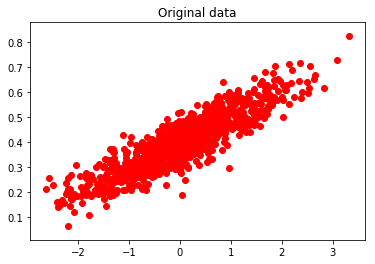

In [8]:
fig = plt.figure()
ax = plt.axes()
ax.scatter(xData, yData, c = 'r')
ax.set_title('Original data')

In [111]:
import tensorflow as tf

In [112]:
tf.reset_default_graph()

with tf.name_scope('LinearRegression') as scope:
    W = tf.Variable(tf.zeros([1]))
    b = tf.Variable(tf.zeros([1]))
    y = W * xData + b

In [113]:
with tf.name_scope('LossFunction') as scope:
    loss = tf.reduce_mean(tf.square(y - yData))

Annotate for TensorBoard:

In [114]:
lossSummary = tf.summary.scalar('loss', loss)
w_ = tf.summary.histogram('W', W)
b_ = tf.summary.histogram('b', b)

In [115]:
mergedOp = tf.summary.merge_all()

In [116]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.6)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()
sess = tf.Session()
#fileWriter = tf.summary.FileWriter('./logs', sess.graph)
sess.run(init)

Iteration 0: W = [0.13313666], b = [0.48297137], loss = 0.010818522423505783
Iteration 1: W = [0.0909218], b = [0.38103083], loss = 0.0029480939265340567
Iteration 2: W = [0.10225127], b = [0.40311414], loss = 0.002551094628870487
Iteration 3: W = [0.09942253], b = [0.3982425], loss = 0.002530670026317239
Iteration 4: W = [0.10010303], b = [0.39933044], loss = 0.0025296106468886137
Iteration 5: W = [0.0999427], b = [0.39908552], loss = 0.0025295554660260677


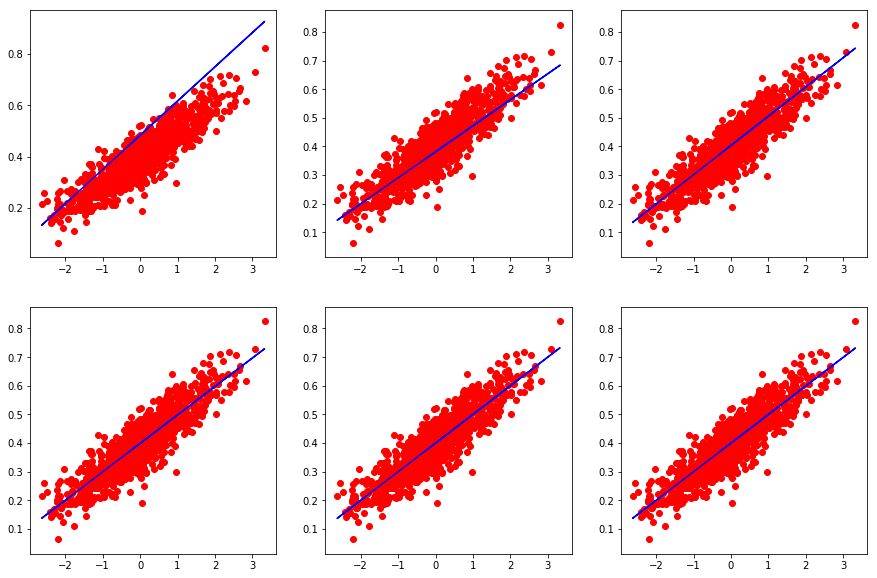

In [117]:
fig = plt.figure()
fig.set_size_inches(15, 10)

for i in range(6):
    sess.run(train)
    WW = sess.run(W)
    bb = sess.run(b)
    lossloss = sess.run(loss)
    print("Iteration {}: W = {}, b = {}, loss = {}".format(i, 
                                                           WW, bb, lossloss))
    
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(xData, yData, c = 'r')    
    ax.plot(xData, sess.run(W) * xData + sess.run(b), c = 'b')
    #fileWriter.add_summary(sess.run(w_), i)
    #fileWriter.add_summary(sess.run(b_), i)
    #fileWriter.add_summary(sess.run(lossSummary), i)
    #fileWriter.add_summary(sess.run(mergedOp), i)